Starter

In [10]:
import pandas as pd

# Replace this with the actual path to your dataset
file_path = 'african_flight_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Show the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the DataFrame
print("\nDataFrame info:")
print(df.info())

# Show basic descriptive statistics for numeric columns
print("\nDescriptive statistics:")
print(df.describe())


First 5 rows of the dataset:
              Airline Origin Destination   ScheduledDeparture  \
0       Kenya Airways    KGL         TUN  2024-04-01 05:32:00   
1             Airlink    CPT         KGL  2024-06-06 06:54:00   
2       Kenya Airways    LOS         JNB  2024-01-24 10:45:00   
3  Ethiopian Airlines    DSS         CAI  2024-03-13 19:16:00   
4            Tunisair    TUN         JNB  2024-02-07 20:21:00   

       ActualDeparture  DelayMinutes  EarlyArrival  
0  2024-04-01 05:28:00            -4          True  
1  2024-06-06 06:54:00             0         False  
2  2024-01-24 11:02:00            17         False  
3  2024-03-13 18:56:00           -20          True  
4  2024-02-07 20:19:00            -2          True  

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125500 entries, 0 to 125499
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Airline             125500 non-n

Step 3

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter
# matplotlib inline

# Optional: Set a style
sns.set(style='whitegrid')


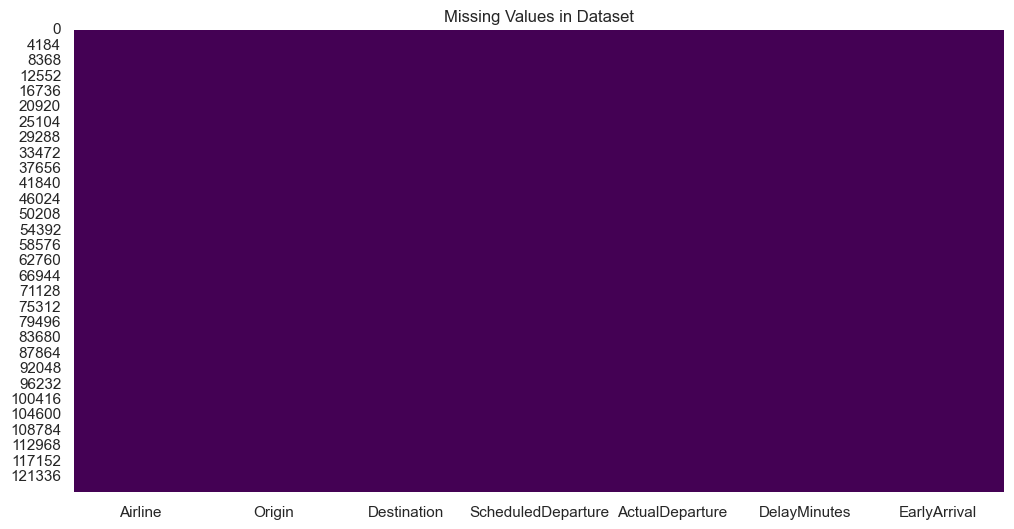

Airline               0
Origin                0
Destination           0
ScheduledDeparture    0
ActualDeparture       0
DelayMinutes          0
EarlyArrival          0
dtype: int64


In [3]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

# Or count them directly
print(df.isnull().sum())


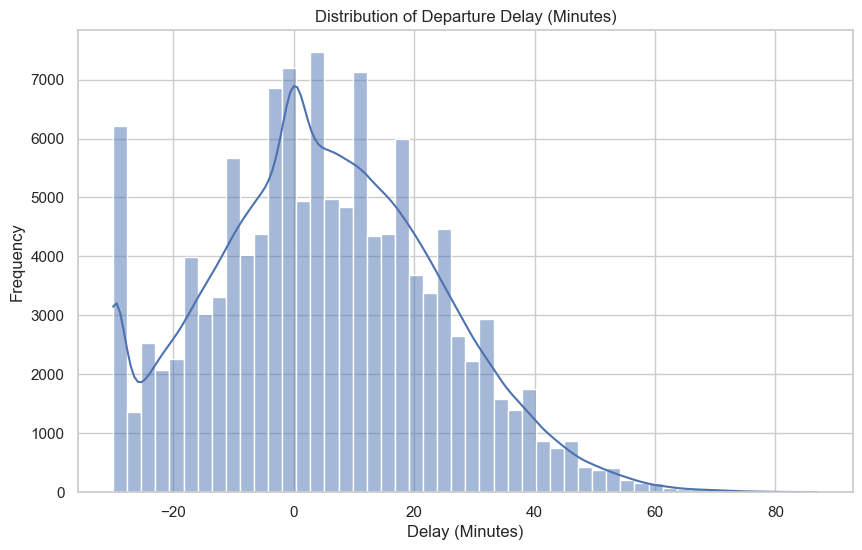

In [5]:
# Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(df['DelayMinutes'].dropna(), bins=50, kde=True)
plt.title('Distribution of Departure Delay (Minutes)')
plt.xlabel('Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()


C:\Users\favor\AppData\Local\Temp\ipykernel_43592\3482207020.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Airline', y='DelayMinutes', ci=None)


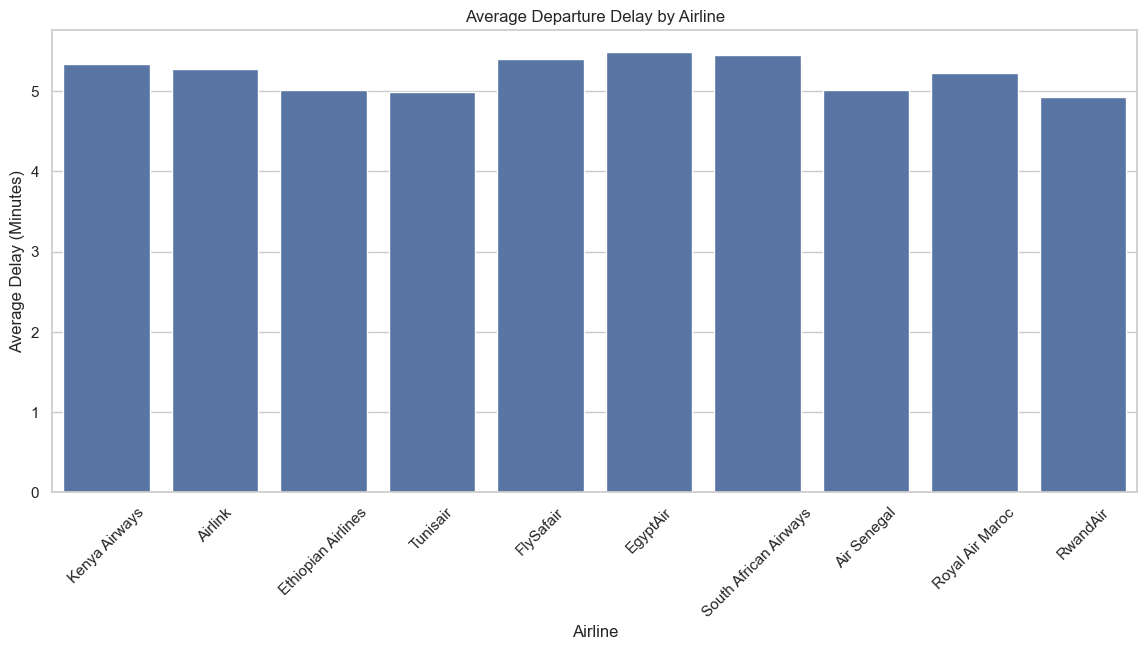

In [6]:
# Replace 'Airline' with your actual column name for airline if different
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Airline', y='DelayMinutes', ci=None)
plt.title('Average Departure Delay by Airline')
plt.xticks(rotation=45)
plt.ylabel('Average Delay (Minutes)')
plt.show()


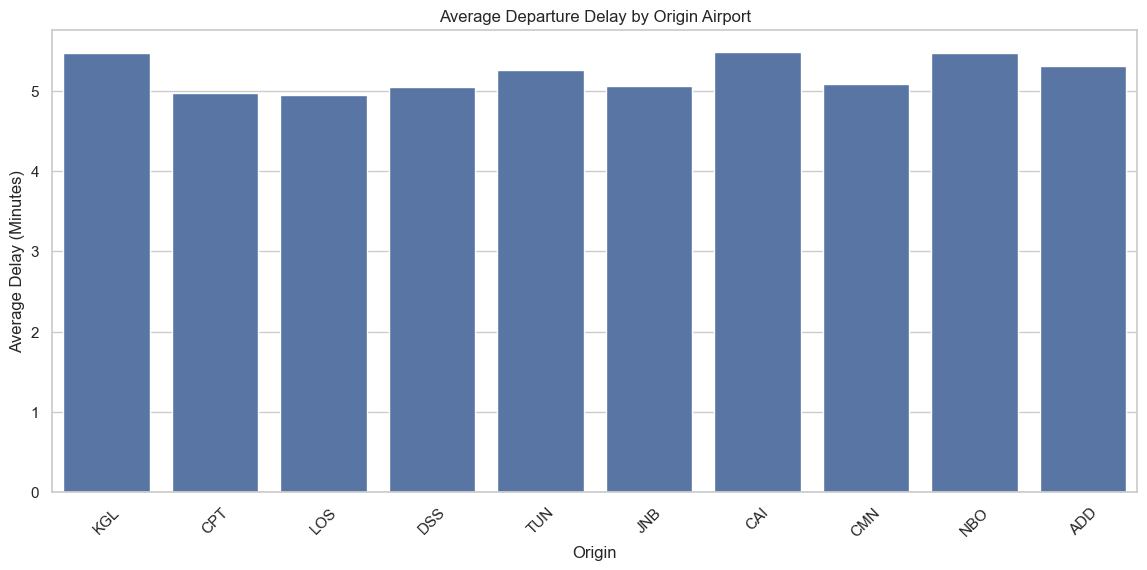

In [7]:
# Average Delay by Origin Airport
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Origin', y='DelayMinutes', errorbar=None)
plt.title('Average Departure Delay by Origin Airport')
plt.xticks(rotation=45)
plt.ylabel('Average Delay (Minutes)')
plt.show()


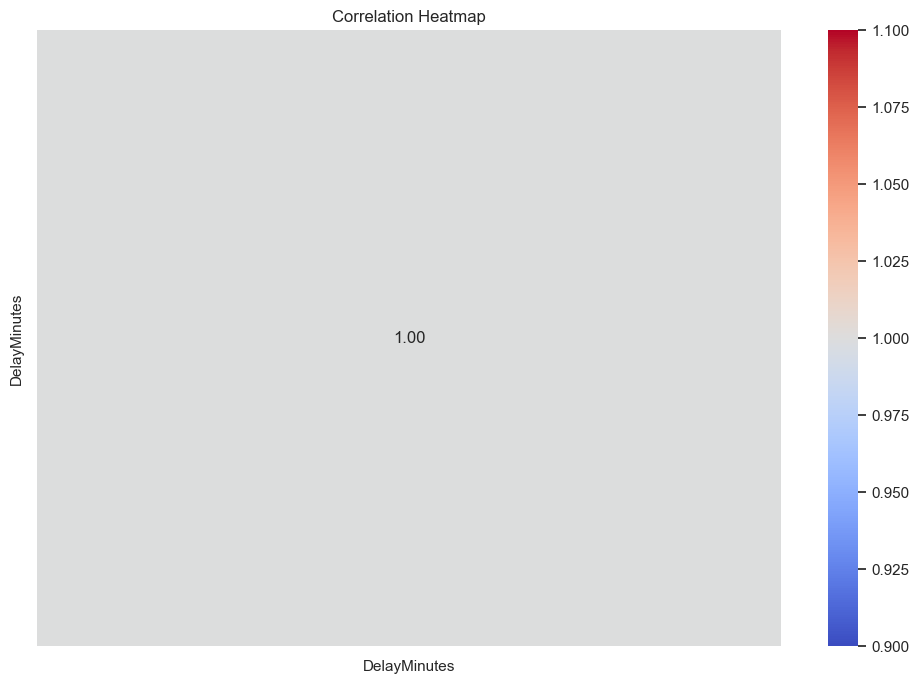

In [8]:
# Correlation Heatmap (Numerical Columns)
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

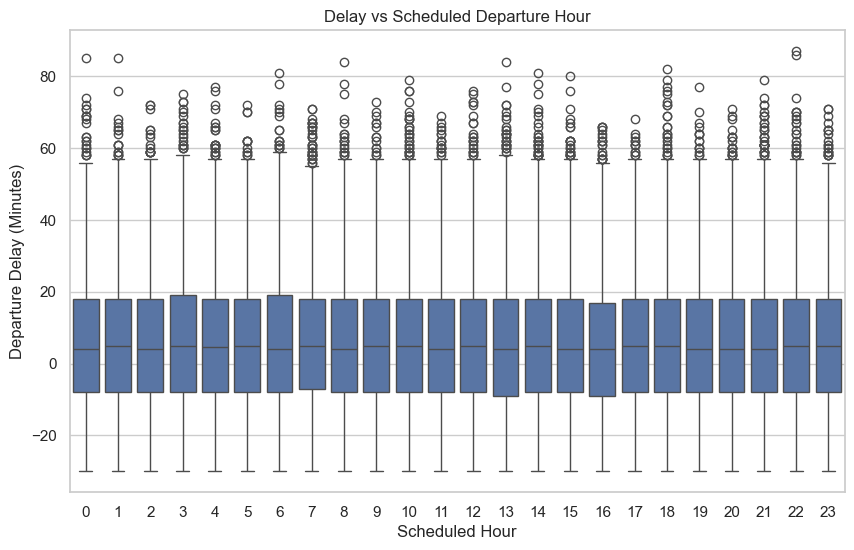

In [11]:
# Optional: Delay vs. Scheduled Departure Time (e.g., morning vs evening)
# Convert time string to hour (e.g., "07:30" → 7)
df['ScheduledHour'] = pd.to_datetime(df['ScheduledDeparture']).dt.hour

plt.figure(figsize=(10, 6))
sns.boxplot(x='ScheduledHour', y='DelayMinutes', data=df)
plt.title('Delay vs Scheduled Departure Hour')
plt.xlabel('Scheduled Hour')
plt.ylabel('Departure Delay (Minutes)')
plt.show()


Preprocessing & Feature Engineering

In [12]:
# Drop rows where DelayMinutes or ScheduledDeparture is missing
df = df.dropna(subset=['DelayMinutes', 'ScheduledDeparture', 'ActualDeparture'])

# Optionally fill missing numeric values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Double check for missing values again
print("Remaining missing values:\n", df.isnull().sum())


Remaining missing values:
 Airline               0
Origin                0
Destination           0
ScheduledDeparture    0
ActualDeparture       0
DelayMinutes          0
EarlyArrival          0
ScheduledHour         0
dtype: int64


In [13]:
# Extract hour from datetime strings
df['ScheduledHour'] = pd.to_datetime(df['ScheduledDeparture']).dt.hour
df['ActualHour'] = pd.to_datetime(df['ActualDeparture']).dt.hour

# Calculate time difference in minutes
scheduled_time = pd.to_datetime(df['ScheduledDeparture'])
actual_time = pd.to_datetime(df['ActualDeparture'])
df['DepartureDelta'] = (actual_time - scheduled_time).dt.total_seconds() / 60

In [14]:
df = pd.get_dummies(df, columns=['Airline', 'Origin', 'Destination'], drop_first=True)

In [26]:
features = [
    'ScheduledHour',
    'ActualHour',
    'DepartureDelta',
] + [col for col in df.columns if col.startswith('Airline_') or col.startswith('Origin_') or col.startswith('Destination_')]

target = 'DelayMinutes'


In [16]:
from sklearn.preprocessing import StandardScaler

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Step 5

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression MSE: 3.215971739564606e-27
Linear Regression R²: 1.0


In [20]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MSE:", mse_dt)
print("Decision Tree R²:", r2_dt)

Decision Tree MSE: 0.0
Decision Tree R²: 1.0


In [21]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R²:", r2_rf)

Random Forest MSE: 1.780876494023892e-06
Random Forest R²: 0.9999999950692542


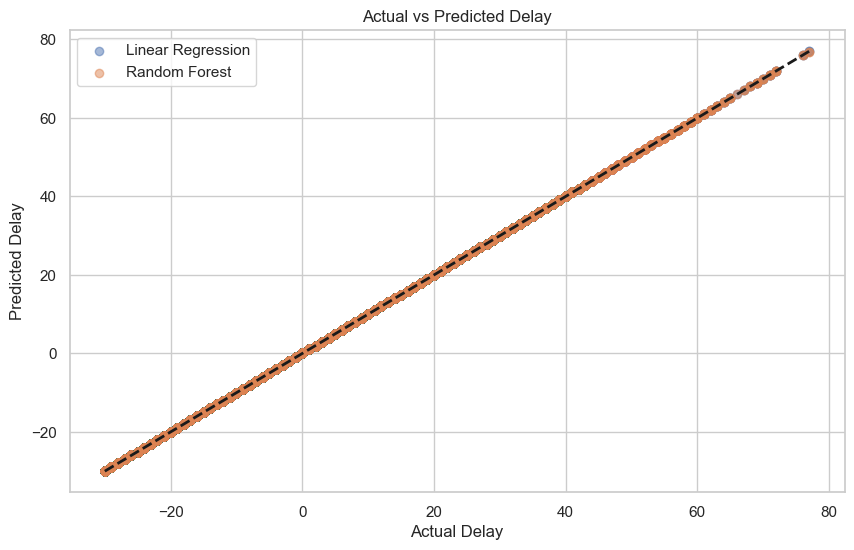

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Actual vs Predicted Delay")
plt.legend()
plt.show()

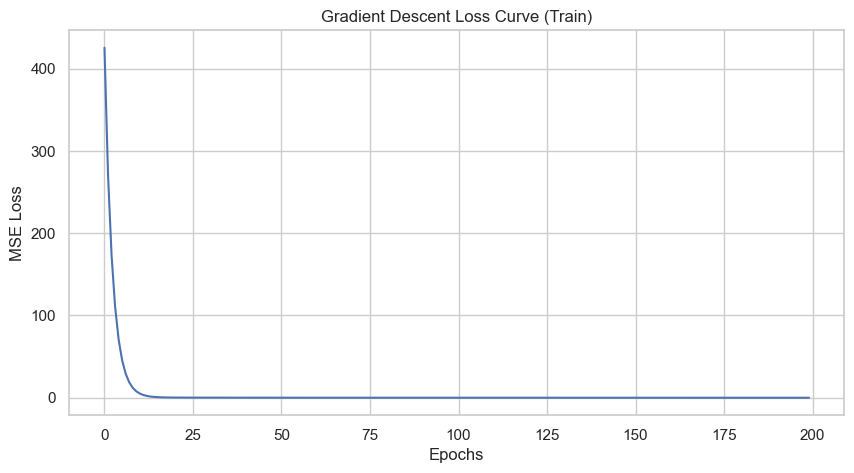

In [23]:
# Manual Gradient Descent for MSE
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # add bias term
    theta = np.random.randn(n + 1)

    loss_history = []
    for epoch in range(epochs):
        predictions = X_b.dot(theta)
        error = predictions - y
        gradients = 2 / m * X_b.T.dot(error)
        theta -= lr * gradients
        loss = mean_squared_error(y, predictions)
        loss_history.append(loss)

    return theta, loss_history

theta_gd, loss_history = gradient_descent(X_train, y_train, lr=0.1, epochs=200)

# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title("Gradient Descent Loss Curve (Train)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

In [24]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [mse_lr, mse_dt, mse_rf],
    "R² Score": [r2_lr, r2_dt, r2_rf]
})

print(results)

               Model           MSE  R² Score
0  Linear Regression  3.215972e-27       1.0
1      Decision Tree  0.000000e+00       1.0
2      Random Forest  1.780876e-06       1.0


In [25]:
import joblib

joblib.dump(rf_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [27]:
import joblib
import numpy as np
import pandas as pd

# Load saved model and scaler
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

# Print actual feature columns from our data
print("Actual feature columns:")
print(features)

# Update FEATURE_COLUMNS to match what we actually have
FEATURE_COLUMNS = features

# Define the function to use in FastAPI later
def predict_delay(input_data: dict):
    try:
        # Convert input dictionary to DataFrame
        input_df = pd.DataFrame([input_data])

        # Ensure all columns are present (especially one-hot encoded)
        for col in FEATURE_COLUMNS:
            if col not in input_df.columns:
                input_df[col] = 0  # set missing columns to 0

        # Reorder columns
        input_df = input_df[FEATURE_COLUMNS]

        # Scale the features
        input_scaled = scaler.transform(input_df)

        # Predict delay
        prediction = model.predict(input_scaled)[0]
        return round(float(prediction), 2)

    except Exception as e:
        return {"error": str(e)}

# Test the function with sample data
test_data = {
    'ScheduledHour': 14,
    'ActualHour': 14,
    'DepartureDelta': 30,
}

# Add zero values for all one-hot encoded features
for col in FEATURE_COLUMNS:
    if col not in test_data:
        test_data[col] = 0

result = predict_delay(test_data)
print(f"\nTest prediction: {result} minutes delay")

Actual feature columns:
['ScheduledHour', 'ActualHour', 'DepartureDelta', 'Airline_Airlink', 'Airline_EgyptAir', 'Airline_Ethiopian Airlines', 'Airline_FlySafair', 'Airline_Kenya Airways', 'Airline_Royal Air Maroc', 'Airline_RwandAir', 'Airline_South African Airways', 'Airline_Tunisair', 'Origin_CAI', 'Origin_CMN', 'Origin_CPT', 'Origin_DSS', 'Origin_JNB', 'Origin_KGL', 'Origin_LOS', 'Origin_NBO', 'Origin_TUN', 'Destination_CAI', 'Destination_CMN', 'Destination_CPT', 'Destination_DSS', 'Destination_JNB', 'Destination_KGL', 'Destination_LOS', 'Destination_NBO', 'Destination_TUN']

Test prediction: 30.0 minutes delay
